In [1]:
import pandas as pd

## 1. Load Data

In [3]:
train_df = pd.read_csv(r'/content/drive/MyDrive/MLDL_개인프로젝트/Corona tweets NLP - Text Classification/datasets/Corona_NLP_train.csv', encoding='latin-1')
train_df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [5]:
test_df = pd.read_csv(r'/content/drive/MyDrive/MLDL_개인프로젝트/Corona tweets NLP - Text Classification/datasets/Corona_NLP_test.csv', encoding='latin-1')
test_df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral
...,...,...,...,...,...,...
3793,3794,48746,Israel ??,16-03-2020,Meanwhile In A Supermarket in Israel -- People...,Positive
3794,3795,48747,"Farmington, NM",16-03-2020,Did you panic buy a lot of non-perishable item...,Negative
3795,3796,48748,"Haverford, PA",16-03-2020,Asst Prof of Economics @cconces was on @NBCPhi...,Neutral
3796,3797,48749,NaN,16-03-2020,Gov need to do somethings instead of biar je r...,Extremely Negative


In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       3798 non-null   int64 
 1   ScreenName     3798 non-null   int64 
 2   Location       2964 non-null   object
 3   TweetAt        3798 non-null   object
 4   OriginalTweet  3798 non-null   object
 5   Sentiment      3798 non-null   object
dtypes: int64(2), object(4)
memory usage: 178.2+ KB


## 2. Basic EDA on Train data

In [7]:
# value count of sentiment
train_df['Sentiment'].value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

In [8]:
# check train, test data ratio
print(len(train_df['OriginalTweet']))
print(len(test_df['OriginalTweet']))
print(len(train_df['OriginalTweet']) / len(test_df['OriginalTweet']))

41157
3798
10.836492890995261


## 3. Preprocess text data

In [9]:
# 1. remove special character & url address letter starts with https~ & \r, \n letter & transform to lower case
import re

def preprocess_text(text):
    # remove special character
    refined_text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    # remove url address letter
    refined_text = ' '.join([i for i in refined_text.split(' ') if not i.startswith('http')])
    # remove \r, \n
    refined_text = refined_text.replace('\r', '')
    refined_text = refined_text.replace('\n', '')
    # change to lower case
    refined_text = refined_text.lower()
    
    return refined_text

# 훈련데이터 Original Tweet 기본 전처리
train_df['OriginalTweet'] = train_df['OriginalTweet'].apply(preprocess_text)
train_df.loc[4, 'OriginalTweet']

'me ready to go at supermarket during the covid19 outbreaknot because im paranoid but because my food stock is litteraly empty the coronavirus is a serious thing but please dont panic it causes shortagecoronavirusfrance restezchezvous stayathome confinement'

In [10]:
# 검증데이터 Original Tweet 기본 전처리
test_df['OriginalTweet'] = test_df['OriginalTweet'].apply(preprocess_text)
test_df.loc[4, 'OriginalTweet']

'toiletpaper dunnypaper coronavirus coronavirusaustralia coronavirusupdate covid19 9news  corvid19 7newsmelb dunnypapergate costco    one week everyone buying baby milk powder the next everyone buying up toilet paper'

In [11]:
%%capture
!pip install nltk

In [12]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [13]:
# 2. tokenize based on preprocessed text
from nltk.tokenize import word_tokenize

def tokenize_text(text: str) -> list:
  return word_tokenize(text)

train_text_list = train_df['OriginalTweet'].apply(tokenize_text)
test_text_list = test_df['OriginalTweet'].apply(tokenize_text)

print(train_text_list[0])
print(test_text_list[0])

print(len(train_text_list))
print(len(test_text_list))

['menyrbie', 'philgahan', 'chrisitv', 'and', 'and']
['trending', 'new', 'yorkers', 'encounter', 'empty', 'supermarket', 'shelves', 'pictured', 'wegmans', 'in', 'brooklyn', 'soldout', 'online', 'grocers', 'foodkick', 'maxdelivery', 'as', 'coronavirusfearing', 'shoppers', 'stock', 'up']
41157
3798


In [14]:
# 3. remove stopwords
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

def remove_stopwords(text_list: list):
  final_res = []
  for text in text_list:
    res = []
    for word in text:
      if word not in stop_words:
        res.append(word)
    final_res.append(res)

  return final_res

train_text_dataset = remove_stopwords(train_text_list)
test_text_dataset = remove_stopwords(test_text_list)

# 모델 훈련 위한 텍스트 데이터셋
print(train_text_dataset[0])

# 모델 검증 위한 텍스트 데이터셋
print(test_text_dataset[0])

['menyrbie', 'philgahan', 'chrisitv']
['trending', 'new', 'yorkers', 'encounter', 'empty', 'supermarket', 'shelves', 'pictured', 'wegmans', 'brooklyn', 'soldout', 'online', 'grocers', 'foodkick', 'maxdelivery', 'coronavirusfearing', 'shoppers', 'stock']


In [15]:
# 4. train text integer encoding
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_text_dataset)
encoded_train_dataset = tokenizer.texts_to_sequences(train_text_dataset)

print(encoded_train_dataset[:5])

[[23506, 23507, 12866], [403, 778, 2495, 180, 2897, 764, 1166, 998, 347, 291, 764, 1166, 2495, 1097, 3951, 3614, 4928, 380, 13, 12, 2289, 12867, 3094, 110, 963, 3270, 155], [1, 747, 1673, 224, 227, 1220, 1722, 12, 173, 81, 2, 73], [4, 29, 31, 23508, 33, 20, 157, 4, 76, 60, 17, 46, 868, 46, 23509, 2, 2, 1, 4394, 23510, 23511], [634, 24, 5, 2, 23512, 47, 4094, 4, 29, 23513, 143, 1, 748, 218, 39, 33, 20, 1598, 23514, 10985, 300, 4394]]


In [16]:
# test data 정수형 인코딩 변환
tokenizer = Tokenizer()
tokenizer.fit_on_texts(test_text_dataset)
encoded_test_dataset = tokenizer.texts_to_sequences(test_text_dataset)

print(encoded_test_dataset[:5])

[[2160, 79, 2616, 2617, 54, 11, 31, 5010, 1429, 1602, 3405, 10, 987, 5011, 5012, 5013, 272, 6], [785, 168, 48, 100, 3406, 3407, 2161, 127, 5014, 55, 786, 5015, 2, 444, 1171, 13], [168, 328, 1851, 488, 2], [12, 20, 1603, 1852, 333, 1430, 272, 6, 5016, 42, 445, 988, 5017, 2162, 5018, 1284, 533, 2, 1285, 5019, 5020, 5021, 5022, 5023, 5024, 787], [215, 5025, 2, 1604, 164, 1, 5026, 3408, 5027, 5028, 372, 43, 88, 36, 20, 446, 334, 2618, 129, 36, 20, 15, 16]]


In [17]:
# 5. padding
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_dataset = pad_sequences(encoded_train_dataset, padding='post')
print(train_dataset[:5])

[[23506 23507 12866     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0]
 [  403   778  2495   180  2897   764  1166   998   347   291   764  1166
   2495  1097  3951  3614  4928   380    13    12  2289 12867  3094   110
    963  3270   155     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0]
 [    1   747  1673   224   227  1220  1722    12   173    81     2    73
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0]
 [    4    29    31 23508    33    20   157     4    76    60    17    46
    868    46 23509     2     2     1  4394 23510 23511     0     0     0
      0     0  

In [18]:
test_dataset = pad_sequences(encoded_test_dataset, padding='post')
print(test_dataset[:5])

[[2160   79 2616 2617   54   11   31 5010 1429 1602 3405   10  987 5011
  5012 5013  272    6    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0]
 [ 785  168   48  100 3406 3407 2161  127 5014   55  786 5015    2  444
  1171   13    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0]
 [ 168  328 1851  488    2    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0]
 [  12   20 1603 1852  333 1430  272    6 5016   42  445  988 5017 2162
  5018 1284  533    2 1285 5019 5020 5021 5022 5023 5024  787    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0]
 [ 215 5025    2 1604  164    1 5026 3408 5027 5028  372   43   88   36
    20  446 

In [19]:
# 6. transform class label to number
# 레이블 데이터 범주형 인코딩
from tensorflow.keras.utils import to_categorical

# 범주 텍스트 숫자 변환
def encode_category(sentiment):
  if sentiment == 'Extremely Positive':
    return 5
  elif sentiment == 'Positive':
    return 4
  elif sentiment == 'Neutral':
    return 3
  elif sentiment == 'Negative':
    return 2
  elif sentiment == 'Extremely Negative':
    return 1

train_label_dataset = train_df['Sentiment'].apply(encode_category).to_list()
test_label_dataset = test_df['Sentiment'].apply(encode_category).to_list()

# 숫자로 변환된 범주형 인코딩 데이터 원핫 인코딩
train_label = to_categorical(train_label_dataset)
train_label = [list(map(int, i[1:])) for i in train_label]

test_label = to_categorical(test_label_dataset)
test_label = [list(map(int, i[1:])) for i in test_label]

print(len(train_label))
print(len(test_label))

41157
3798


## 3. Modeling

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, Bidirectional
from tensorflow.keras.models import load_model

# 1. define model

# 단어 개수에 따른 입력층 뉴런 개수 지정
vocab_size = max([len(i) for i in train_dataset])

embedding_dim = 128
hidden_units = 128
num_classes = 5

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(Bidirectional(LSTM(hidden_units)))
# model.add(LSTM(hidden_units))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         5760      
                                                                 
 bidirectional (Bidirectiona  (None, 256)              263168    
 l)                                                              
                                                                 
 dense (Dense)               (None, 5)                 1285      
                                                                 
Total params: 270,213
Trainable params: 270,213
Non-trainable params: 0
_________________________________________________________________


In [21]:
# 2. fit model to train data & validate
train_label = np.array(train_label)
test_label = np.array(test_label)

history = model.fit(train_dataset, train_label, batch_size=128, epochs=50, validation_data=(test_dataset, test_label))

Epoch 1/50
322/322 [==============================] - 14s 16ms/step - loss: 1.4539 - acc: 0.3491 - val_loss: 1.6527 - val_acc: 0.2667
Epoch 2/50
322/322 [==============================] - 4s 13ms/step - loss: 1.3988 - acc: 0.3809 - val_loss: 1.6229 - val_acc: 0.2820
Epoch 3/50
322/322 [==============================] - 4s 13ms/step - loss: 1.3940 - acc: 0.3808 - val_loss: 1.6380 - val_acc: 0.2657
Epoch 4/50
322/322 [==============================] - 4s 13ms/step - loss: 1.3900 - acc: 0.3834 - val_loss: 1.6370 - val_acc: 0.2567
Epoch 5/50
322/322 [==============================] - 4s 13ms/step - loss: 1.3894 - acc: 0.3845 - val_loss: 1.6718 - val_acc: 0.2807
Epoch 6/50
322/322 [==============================] - 4s 13ms/step - loss: 1.3867 - acc: 0.3852 - val_loss: 1.6585 - val_acc: 0.2667
Epoch 7/50
322/322 [==============================] - 4s 13ms/step - loss: 1.3849 - acc: 0.3854 - val_loss: 1.6357 - val_acc: 0.2622
Epoch 8/50
322/322 [==============================] - 4s 13ms/step -

In [22]:
model.save('BiLSTM.h5')

In [23]:
loaded_model = load_model('BiLSTM.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(test_dataset, test_label)[1]))

119/119 [==============================] - 2s 6ms/step - loss: 2.8796 - acc: 0.2530

 테스트 정확도: 0.2530


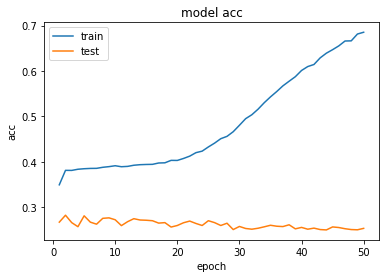

In [24]:
import matplotlib.pyplot as plt

epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['acc'])
plt.plot(epochs, history.history['val_acc'])

plt.title('model acc')

plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.show()